In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

# Q. 2E1

Which of the following expressions below correspond to the statement: *the probability of rain on Monday?*

1. Pr(rain)
2. Pr(rain|Monday)
3. Pr(Monday|rain)
4. Pr(rain, Monday) / Pr(Monday)

**Answer**

2. Pr(rain|Monday) and 4. Pr(rain, Monday) / Pr(Monday)

4. Can be written as follows:
Pr(rain|Monday)Pr(Monday) / Pr(Monday) = Pr(rain|Monday) = 2.

# Q. 2E2

Which of the following statements corresponds to the expression: Pr(Monday|rain)?

1. The probability of rain on Monday
2. The probability of tain, given that it Monday
3. The probability that is Monday, given that it is raining
4. The probability that it is Monday and that it is raining

**Answer**

3. The probability that is Monday, given that it is raining 

# Q. 2E3

Which of the expressions below correspond to the statement: *the probability that it is Monday, given that it is raining?*

1. Pr(Monday|rain)
2. Pr(rain|Monday)
3. Pr(rain|Monday)Pr(Monday)
4. Pr(rain|Monday)Pr(Monday)/Pr(rain)
5. Pr(Monday|rain)Pr(rain)/Pr(Monday)

**Answer**

1. Pr(Monday|rain) and 3. Pr(rain|Monday)Pr(Monday)

# Q. 2E4

The Bayesian statistician Bruno de Finetti (1906 - 1985) begin his 1973 book on probability theory with the declaration: "PROBABILITY DOES NOT EXIST". The capitals appeared in the original, so I imagine de Finetti wanted us to shout the statement. What he meant is that probability is a device for describing uncertainty from the perspective of the observer with limited knowledge; it has no objective reality. Discuss the globe tossing example from the chapter, in light of this satement. What does it mean to say "the probability of water is 0.7"?

**Answer**
My interpretation of this declariation is that if we had perfect knowledge of the universe then probability would not be needed. In the context of the globe tossing example, if we know the stating position of the toss, the spin given to the global, the speed at which the globe was thrown, the environment around the globe, the position of the finger pointing at the globe when caught, etc. then we would always know exactly what the outcome would be and thus probability would not be needed. We could toss the globe *n* amount of times and always know whether it would be water or land. This in reality is impossible to know so, i.e. we will always be in a position of limited knowledge, so probability allows us to give our best estimate of what the outcome is likely to be.


# Q. 2M1

Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for *p*.

1. W, W, W
2. W, W, W, L
3. L, W, W, L, W, W, W

In [27]:
# 1. W, W, W

w = 3
l = 0
n = w + l

# grid approximation
p_grid = np.arange(0.0, 1.0, 0.05)
prior = np.full(20, 1)

likelihood = stats.binom.pmf(w, n, p_grid)
unstd_posterior = prior * likelihood

posterior_1 = unstd_posterior / sum(unstd_posterior)

# 2. W, W, W, L

w = 3
l = 1
n = w + l

# grid approximation
p_grid = np.arange(0.0, 1.0, 0.05)
prior = np.full(20, 1)

likelihood = stats.binom.pmf(w, n, p_grid)
unstd_posterior = prior * likelihood

posterior_2 = unstd_posterior / sum(unstd_posterior)

# 3. L, W, W, L, W, W, W

w = 5
l = 2
n = w + l

# grid approximation
p_grid = np.arange(0.0, 1.0, 0.05)
prior = np.full(20, 1)

likelihood = stats.binom.pmf(w, n, p_grid)
unstd_posterior = prior * likelihood

posterior_3 = unstd_posterior / sum(unstd_posterior)

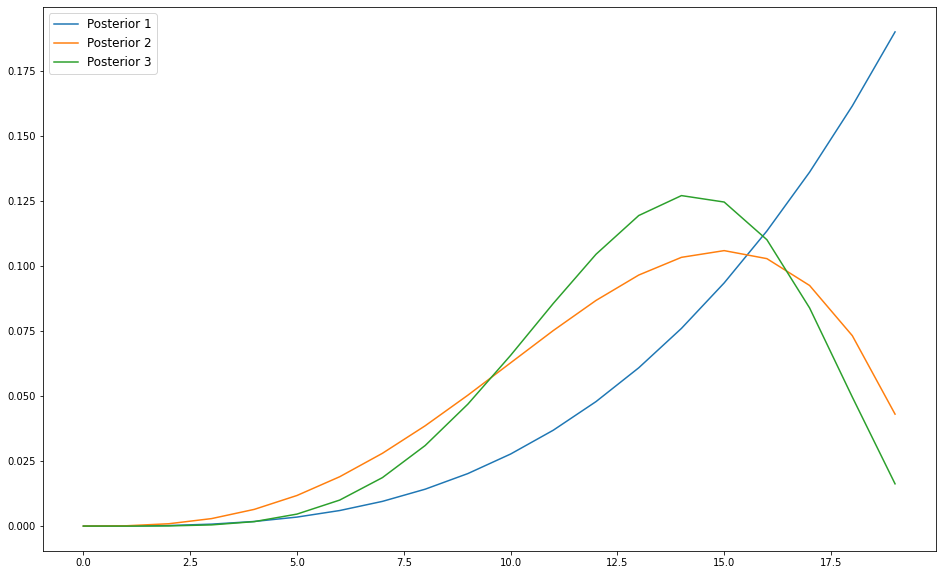

In [28]:
plt.figure(figsize = (16, 10))

plt.plot(posterior_1, label='Posterior 1')
plt.plot(posterior_2, label='Posterior 2')
plt.plot(posterior_3, label='Posterior 3')
plt.legend(loc=2, fontsize=12);

# Q. 2M2 

Now assume a prior for *p* that is equal to zero when $p < 0.5$ and is a positive constant when $p >= 0.5$. Again, compute and plot grid approximate posterior distribution for each of the sets of observations in the problem just above.

In [34]:
# 1. W, W, W

w = 3
l = 0
n = w + l

# grid approximation
p_grid = np.arange(0.0, 1.0, 0.05)
prior = np.concatenate((np.full(10, 0), np.full(10, 1)))

likelihood = stats.binom.pmf(w, n, p_grid)
unstd_posterior = prior * likelihood

posterior_1 = unstd_posterior / sum(unstd_posterior)

# 2. W, W, W, L

w = 3
l = 1
n = w + l

# grid approximation
p_grid = np.arange(0.0, 1.0, 0.05)
prior = np.concatenate((np.full(10, 0), np.full(10, 1)))

likelihood = stats.binom.pmf(w, n, p_grid)
unstd_posterior = prior * likelihood

posterior_2 = unstd_posterior / sum(unstd_posterior)

# 3. L, W, W, L, W, W, W

w = 5
l = 2
n = w + l

# grid approximation
p_grid = np.arange(0.0, 1.0, 0.05)
prior = np.concatenate((np.full(10, 0), np.full(10, 1)))

likelihood = stats.binom.pmf(w, n, p_grid)
unstd_posterior = prior * likelihood

posterior_3 = unstd_posterior / sum(unstd_posterior)

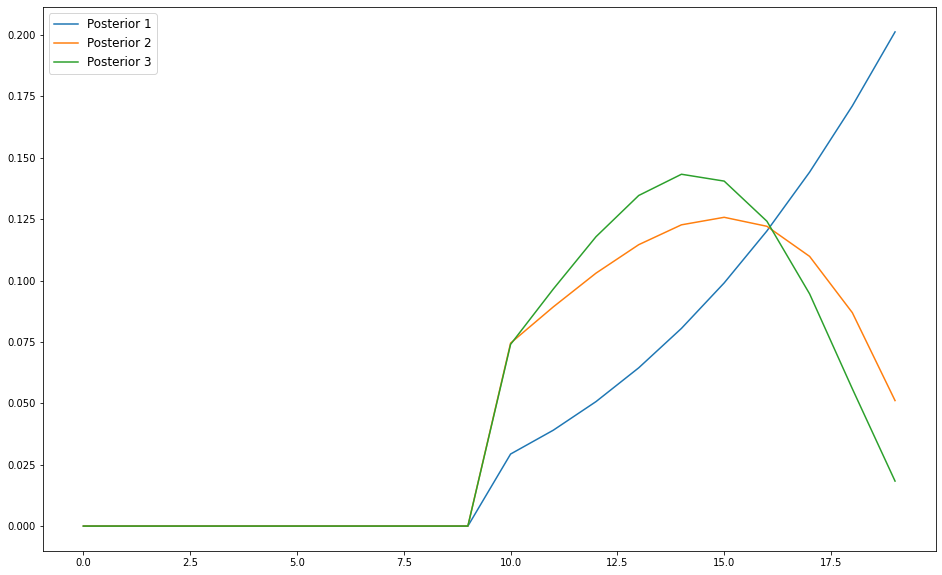

In [35]:
plt.figure(figsize = (16, 10))

plt.plot(posterior_1, label='Posterior 1')
plt.plot(posterior_2, label='Posterior 2')
plt.plot(posterior_3, label='Posterior 3')
plt.legend(loc=2, fontsize=12);

# Q. 2M3

Suppose there are two globes, one for Earth and one for Mars. The Earth globel is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes - you don't know which, was tossed in the air and produced a "land" observation. Assume that each globe is equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing "land" $Pr(Earth|land)$, is 0.23.

**Answer**

$Pr(Earth) = 0.5$

$Pr(Mars) = 0.5$

$Pr(Land|Earth) = 0.3$

$Pr(Land|Mars) = 1$

$Pr(Earth|Land) = Pr(Land|Earth)Pr(Earth) / Pr(Land)$

$Pr(Earth|Land) = Pr(Land|Earth)Pr(Earth) / Pr(Land|Earth)Pr(Earth) + Pr(Land|Mars)Pr(Mars)$

$Pr(Earth|Land) = (0.3)(0.5) / (0.3)(0.5) + (1)(0.5) = 0.15 / 0.65 = 0.23$

# Q. 2M4

Suppose you have a deck with only three cards. Each card has twos sides, and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it flat on a table. A black side is showing up, but you don't know the color of the side facing down. Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of the chapter) to approach the problem. This means counting up the ways that each card could produce the observed data (a black side facing up on the table).

Pr(black) = 2/3
Pr(black|double black) = 1
Pr(double black) = 1/3

Pr(double black|black) = Pr(black|double black)Pr(double black) / Pr(black) = (1/3)(1) / (2/3) = 2/3

# Q. 2M5

Now suppose there are 4 cards, B/B, B/W, W/W, and another B/B. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

Pr(black) = 5/8
Pr(black|double black) = 1
Pr(double black) = 1/2

Pr(double black|black) = Pr(black|double black)Pr(double black) / Pr(black) = (1/2)(1) / (5/8) = 4/5

# Q. 2M6

Imagine the black ink is heavy, and so the cards with black sides are heavier than cards with white sides. As a result, it's less likely that a card with black sides is pulled from the bag. So again assume there are three cards: B/B, B/W, W/W. After experimenting a number of times, you conclude that for every ay to pull the B/B card, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5. Use the counting method as before.

Pr(B) = Pr(B|B/B)Pr(B/B) + Pr(B|B/W)Pr(B/W) + Pr(B|W/W)Pr(W/W) = (1)(1/6) + (1/2)(2/6) + (0)(3/6) = 1/3
Pr(B|DB) = 1
Pr(DB) = 1/6

Pr(DB|B) = Pr(B|DB)Pr(DB) / Pr(B) = (1)(1/6) / (1/3) = 1/2

# Q. 2M7

Assume again the original card problem, with a single card showing a black side face up. Before looking at the other side, we draw another card from the bag and lay it face up on the table. The face that is shown on the new card is white. Show that the probability that the first card, that one showing a black has the black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat this like a sequence of globe tosses, counting all the ways to see each observation, for each possible first card.

Pr(B/B) = 1/3
Pr(B/W) = 1/3
Pr(W/W) = 1/3

Pr(B/B|B) = Pr(B|B/B)Pr(B/B) / Pr(B)

# Q. 2H1

Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family size. Species A gives birth to twins 10% of the time, otherwise birthing a single infact. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research.

Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?


Pr(P_A) = 0.5
Pr(P_B) = 0.5

Pr(twin|P_A) = 0.1
Pr(single|P_A) = 0.9

Pr(twin|P_B) = 0.2
Pr(single|P_B) = 0.8

Pr(P_A|twin_1) = Pr(twin_1|P_A)Pr(P_A) / Pr(twin_1) = (0.1)(0.5) / (0.1)(0.5) + (0.2)(0.5) = 1/3

Pr(P_B|twin_1) = 1 - Pr(P_A|twin_1) = 2/3

Pr(twin_2|twin_1) = Pr(twin_2, 

# Q. 2H2

Recall all the facts from the problem above. Now compute the probability that the pandas we have is from Species A, assuming we have observed only the first birth and that it was twins.

Pr(P_A|twin_1) = Pr(twin_1|P_A)Pr(P_A) / Pr(twin_1) = (0.1)(0.5) / (0.1)(0.5) + (0.2)(0.5) = 1/3

# Q. 2H3

Continue on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infact. Compute the posterior probability that this panda is species A.

Pr(A | T1,S2) = 

# Q. 2H4

A common boast of Bayesian statistics is that Bayesian inference makes it easy to use all of the data, even if the data are of different types.

So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, is imperfect. This is the information you have:

* The probabilty it correctly identifies a species A pandas is 0.8.
* The probabilty it correctly identifies a species B pandas is 0.65.

The vet administers the test to your panda and tells you that the test is positive for species A. First ignore the previous information from the births and compute the posterior probability that your panda is species A. Then redo your calculations, now using the birth data as well.

Pr(A|P) = 0.8
Pr(A|N) = 0.2
Pr(B|P) = 0.65
Pr(B|N) 0.35

Pr(A) = Pr(A|P)Pr(P) + Pr(A|N)Pr(N)